In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
#load data - 
df = pd.read_csv(r"E:\MLIoT\ML\dataset\combined_cycle_power_plant_dataset.csv")
df.shape

(9568, 5)

# Data Science - Predictive Modelling Project

1. Domain Exploration
    - Understand the business process, how business functions
    - Identify few problems and the beleif based solutions
    - Identify opportunities where business relies on expertise of an SME.
    

2. Data Collection and Data Exploration
    - understand the data structure
    - Ask for data dictionary to the business
    - explore data to identify issues with data quality and patterns in general with in data 


3. Data cleaning
    - handle unwanted columns
    - handle missing values
    - handle duplicate entries
    - handle outliers and un natural values


4. Feature Engineering
    - Feature Extraction
        - use data engieering and statistics to create new useful features from existing data
    - Feature Selection - select best features which are relevant to predict the label
        - EDA ( Exploratory Data Analytics ) using Data Visualization
        - EDA using statistics


5. Preprocessing of data
    - encoding of data
    - scaling of features
    - splitting data into train and test sets


6. Apply ML to build a predictive model
    - Use a ML algorithm and train using train set


7. Performance Analysis - How good the model is?
    - check performance of model using train data and test data


8. Optimization & Tuning
    - improve the performance of the ML algorithm


9. Deploy the model to production
    - Export the model as a portable file
    - deploy it as REST service


10. Monitoring the perfomance of a model in production



# 2. Data Exploration

In [5]:
df.shape

(9568, 5)

In [6]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# 3. Data Cleaning

In [9]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [10]:
#check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [11]:
#check for duplicates
df.duplicated().sum()

41

In [12]:
# drop the duplicates
df.drop_duplicates(inplace=True)

In [13]:
#check for duplicates
df.duplicated().sum()

0

In [14]:
# check for outliers
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

# Feature Engineering
     - Feature Extraction
     - Feature Selection
     
     
**Feature Selection using Data Visualization**

Bivariate Analytics

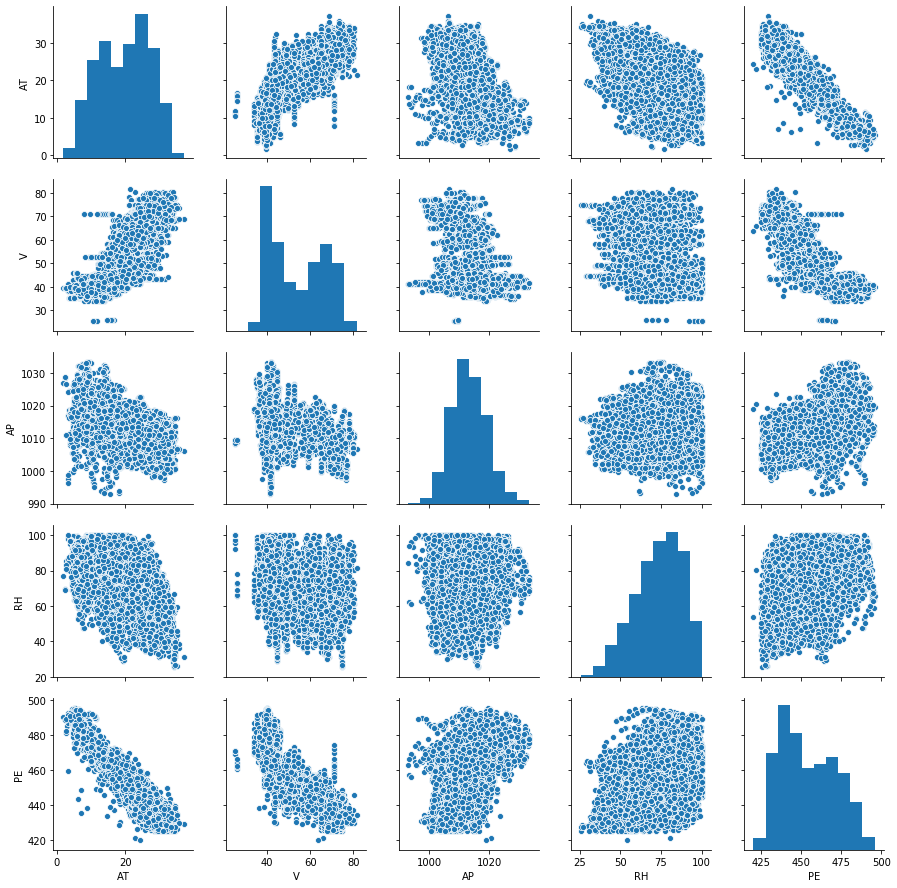

In [15]:
sns.pairplot(df)
plt.show()

**Feature Selection using Correlation Analysis**

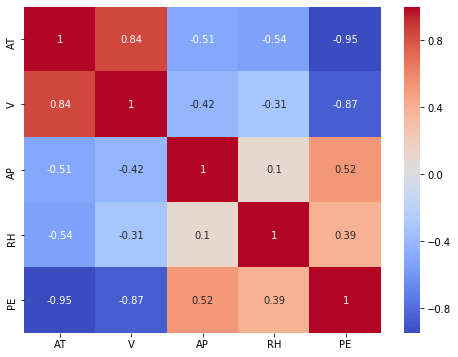

In [18]:
cor = df.corr()
plt.figure(figsize=(8,6))
ax = sns.heatmap(cor,annot=True,cmap="coolwarm")
top,bot = ax.get_ylim()
ax.set_ylim(top+0.5,bot-0.5)
plt.show()

- if corr(x,y) > +0.5 - Very good correlation
- if corr(x,y) is between +0.1 to +0.5    - Good Correlation

- if corr(x,y)  < -0.5 - Very good correlation
- if corr(x,y) is between -0.1 to -0.5    - Good Correlation

- if corr(x,y) is between -0.1 to +0.1   - bad correlation

In [19]:
import statsmodels

In [20]:
from statsmodels.stats.weightstats import ztest

In [28]:
#case 1
zstat,pvalue = ztest([5],[3.1,2.5,3.1,2.9,3.2,3.9,4.2,4.5,3.7,2.5,2.3])
pvalue

0.022214557978004822

In [32]:
#case 2
zstat,pvalue = ztest([5],[4.1,4.5,5.1,4.9,4.2,4.9,4.2,4.5,4.7,5.5,5.3])
pvalue

0.563011431414632

# ANOVA

ANOVA = Analysis of variance – compare means / variation in two or more samples 

Sample1 – an array having data of age of customers who left the bank 

Sample2 – an array having data of age of customers who didn't leave the bank 
*************************************************************
 

 

**For ANOVA -**  

Null Hypothesis – H0 = means of two samples are similar to each other 

Alternate Hypothesis – Ha = means of two samples are different than each other 

 

 

- If the business confidence is = 95% = 0.95 

- Significance level = 5% = 0.05 

 ******************************

 

If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = feature is not important  

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = feature is important 

In [17]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [19]:
x = df[['AT',"V","AP","RH"]]
y = df["PE"]
from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(x,y)

for i in range(len(x.columns)): print(x.columns[i], pval[i])

AT 0.0
V 0.0
AP 0.0
RH 0.0


In [21]:
# getting the feature set and the label
x = df[['AT',"V","AP","RH"]]
y = df["PE"]

# Preprocessing

- encoding of features
- train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(9527, 4)
(7621, 4)
(1906, 4)
(9527,)
(7621,)
(1906,)


# Apply Machine Learning Algorithms

In [23]:
from sklearn.linear_model import LinearRegression
# creating an object of type class linear regression
model = LinearRegression()

In [24]:
#train the model using train data set - xtrain and ytrain
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

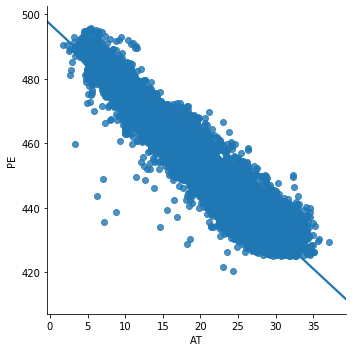

In [32]:
sns.lmplot(x='AT',y='PE',data=df)

# Performance Analysis

In [34]:
new_data = np.array([[31.25,69.51,1010.25,36.83]])
model.predict(new_data)

array([433.40695516])

In [35]:
# feed the xtest to the model to get ypred
ypred = model.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.9286769219658513

# Exporting for productization

In [38]:
import joblib
joblib.dump(model,"ccpp_model.pkl")

['ccpp_model.pkl']